# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 417931300
sectors = np.array([14,15,21,22,41,48])

period = 7.7689153423
tdepth = 0.0009697096956142764

lc_file = "TOI_2068_S14_15_21_22_41_48.csv"
contrastcurve_file = "TOI_2068_Ks.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_11284\147355278.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap14, ap15, ap21, ap22, ap41, ap48])


Sector 14


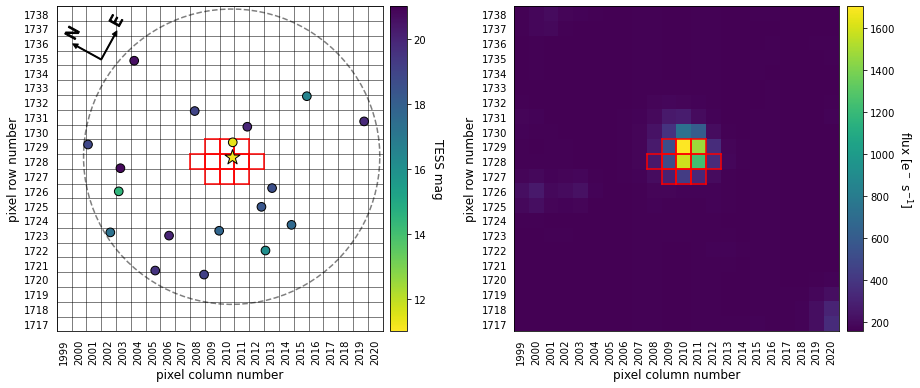

Sector 15


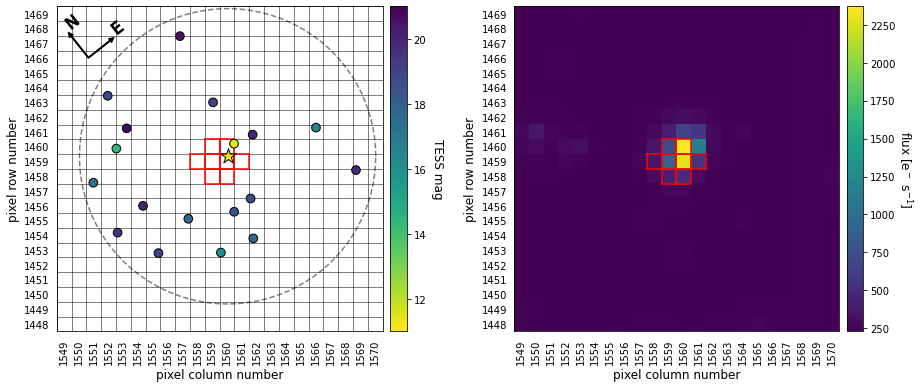

Sector 21


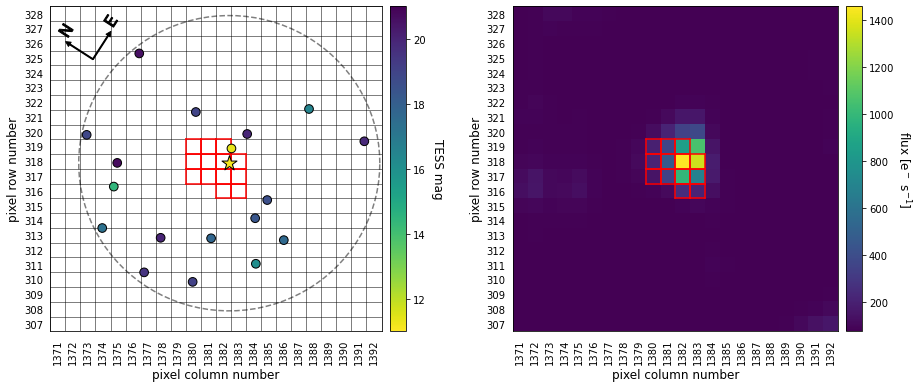

Sector 22


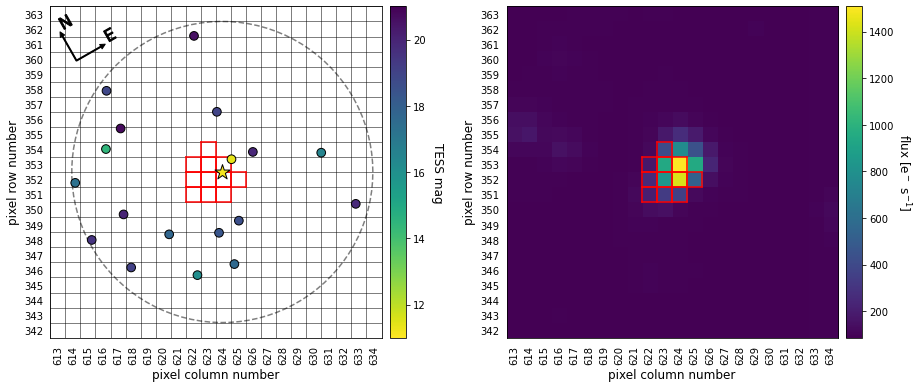

Sector 41


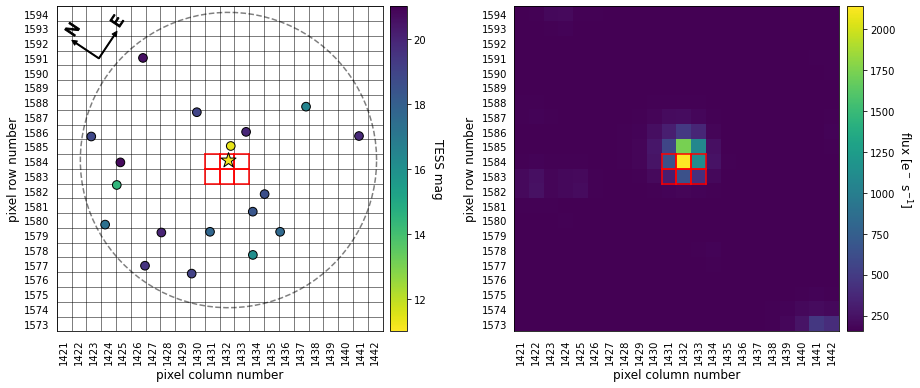

Sector 48


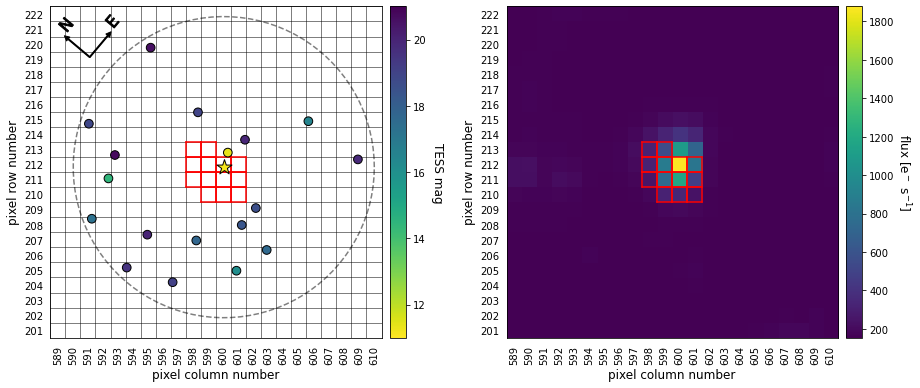

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,417931300,11.1806,9.872,9.237,9.007,186.275286,60.418372,0.538526,0.542573,3700.0,18.862900,0.000,0.000
1,417931299,11.3733,10.045,9.431,9.158,186.285543,60.420681,0.515414,0.517847,3640.0,18.826000,20.033,65.488
2,950596841,19.9381,NaN,NaN,NaN,186.301565,60.418893,NaN,NaN,NaN,1.448360,46.740,87.689
3,950596792,18.5838,NaN,NaN,NaN,186.268676,60.399640,NaN,NaN,3966.0,0.705522,68.451,189.888
4,950596791,18.3254,NaN,NaN,NaN,186.251935,60.399583,NaN,NaN,5403.0,0.070371,79.363,211.547
5,950596842,19.0048,NaN,NaN,NaN,186.292957,60.438634,NaN,NaN,4034.0,0.276161,79.413,23.280
6,417920871,17.7451,16.470,15.735,15.837,186.219982,60.408688,0.670000,0.609122,4266.0,0.512269,104.299,250.496
7,417931308,17.6113,15.828,15.163,14.935,186.250668,60.386635,0.252822,0.278975,3172.0,2.936410,122.350,200.974
8,417931302,16.5040,17.486,15.804,16.481,186.344374,60.405453,NaN,NaN,NaN,NaN,131.319,110.713
9,417920869,16.0882,14.859,14.163,14.084,186.223534,60.390216,0.484599,0.486543,3822.0,2.104080,136.897,222.255


In [4]:
ap14 = np.array([[2009,1727],[2010,1727],[2011,1727],[2008,1728],
                 [2009,1728],[2010,1728],[2011,1728],[2012,1728],
                 [2009,1729],[2010,1729],[2011,1729]])

ap15 = np.array([[1559,1458],[1560,1458],[1558,1459],[1559,1459],
                 [1560,1459],[1561,1459],[1559,1460],[1560,1460]])

ap21 = np.array([[1382,316],[1383,316],[1380,317],[1381,317],[1382,317],
                 [1383,317],[1380,318],[1381,318],[1382,318],[1383,318],
                 [1380,319],[1381,319],[1382,319]])

ap22 = np.array([[622,351],[623,351],[624,351],[622,352],
                 [623,352],[624,352],[625,352],[622,353],
                 [623,353],[624,353],[623,354]])

ap41 = np.array([[1431,1583],[1432,1583],[1433,1583],
                 [1431,1584],[1432,1584],[1433,1584]])

ap48 = np.array([[599,210],[600,210],[601,210],[598,211],[599,211],
                 [600,211],[601,211],[598,212],[599,212],[600,212],
                 [601,212],[598,213],[599,213]])

apertures = np.array([ap14, ap15, ap21, ap22, ap41, ap48])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,417931300,11.1806,9.872,9.237,9.007,186.275286,60.418372,0.538526,0.542573,3700.0,18.862900,0.000,0.000,7.066864e-01,0.001372
1,417931299,11.3733,10.045,9.431,9.158,186.285543,60.420681,0.515414,0.517847,3640.0,18.826000,20.033,65.488,2.932773e-01,0.003306
2,950596841,19.9381,NaN,NaN,NaN,186.301565,60.418893,NaN,NaN,NaN,1.448360,46.740,87.689,9.116884e-06,0.000000
3,950596792,18.5838,NaN,NaN,NaN,186.268676,60.399640,NaN,NaN,3966.0,0.705522,68.451,189.888,1.956128e-05,0.000000
4,950596791,18.3254,NaN,NaN,NaN,186.251935,60.399583,NaN,NaN,5403.0,0.070371,79.363,211.547,6.352464e-06,0.000000
5,950596842,19.0048,NaN,NaN,NaN,186.292957,60.438634,NaN,NaN,4034.0,0.276161,79.413,23.280,1.206777e-06,0.000000
6,417920871,17.7451,16.470,15.735,15.837,186.219982,60.408688,0.670000,0.609122,4266.0,0.512269,104.299,250.496,1.341624e-07,0.000000
7,417931308,17.6113,15.828,15.163,14.935,186.250668,60.386635,0.252822,0.278975,3172.0,2.936410,122.350,200.974,1.822549e-10,0.000000
8,417931302,16.5040,17.486,15.804,16.481,186.344374,60.405453,NaN,NaN,NaN,NaN,131.319,110.713,3.563594e-14,0.000000
9,417920869,16.0882,14.859,14.163,14.084,186.223534,60.390216,0.484599,0.486543,3822.0,2.104080,136.897,222.255,1.791177e-12,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

1 417931299


In [7]:
#target.stars['tdepth'][1] = 0

# Ploting CC File

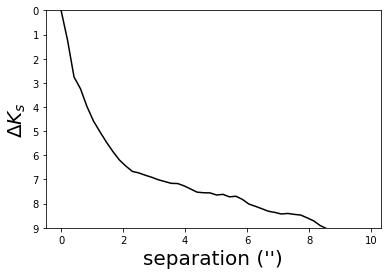

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 2.08 s
Wall time: 2.14 s


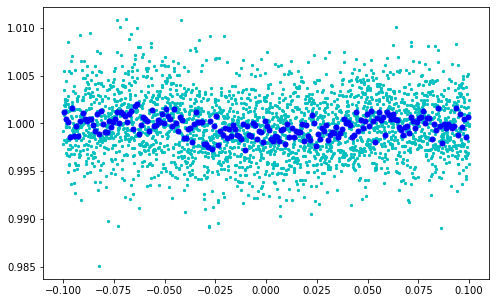

In [9]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
%%time

FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 417931300.


Calculating EB and EBx2P scenario probabilities for 417931300.
Calculating PTP scenario probability for 417931300.
Calculating PEB and PEBx2P scenario probabilities for 417931300.
Calculating STP scenario probability for 417931300.
Calculating SEB and SEBx2P scenario probabilities for 417931300.
Calculating DTP scenario probability for 417931300.
Calculating DEB and DEBx2P scenario probabilities for 417931300.
Calculating BTP scenario probability for 417931300.
Calculating BEB and BEBx2P scenario probabilities for 417931300.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 417931299.
FPP =  0.29555183547628494
NFPP =  0.2895130301299646
Calculating TP scenario probabilitiey for 417931300.
Calculating EB and EBx2P scenario probabilities for 417931300.
Calculating PTP scenario probability for 417931300.
Calculating PEB and PEBx2P scenario probabilities for 417931300.
Calculating STP scenario probability for 417931300.
Calculating SEB and SEBx2P scenario probabilities for 41793

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.2918955770493732
NFPP =  0.28559825370365866


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,417931300,TP,0.538526,0.542573,7.768915,87.981570,0.275928,7.061717e-01,124.214878,2.185319,0.000000,0.000000,5.466295e-01
1,417931300,EB,0.538526,0.542573,7.768915,85.896212,1.788193,2.143811e-01,56.291689,0.000000,0.505280,0.509143,2.076944e-22
2,417931300,EBx2P,0.538526,0.542573,15.537831,88.533225,0.630273,7.841084e-01,196.736587,0.000000,0.537623,0.542573,5.471598e-10
3,417931300,PTP,0.538526,0.542573,7.768915,88.586092,0.567903,3.220500e-01,186.429853,2.295664,0.000000,0.000000,3.468121e-02
4,417931300,PEB,0.538526,0.542573,7.768915,86.282160,1.763783,1.277401e-01,62.301894,0.000000,0.496917,0.499356,1.318369e-22
5,417931300,PEBx2P,0.538526,0.542573,15.537831,88.336299,0.633483,6.450766e-01,150.655846,0.000000,0.517651,0.523608,9.451900e-09
6,417931300,STP,0.344434,0.355347,7.768915,89.151246,0.398763,3.288584e-01,166.132673,2.845379,0.000000,0.000000,5.948010e-03
7,417931300,SEB,0.101839,0.122628,7.768915,89.293549,0.625725,5.103112e-01,181.051642,0.000000,0.026934,0.100000,1.108944e-09
8,417931300,SEBx2P,0.528296,0.535817,15.537831,88.420344,0.935519,7.241868e-01,204.998765,0.000000,0.510099,0.514793,4.643444e-09
9,417931300,DTP,0.538526,0.542573,7.768915,88.571254,0.485364,3.090892e-01,150.948333,3.020084,0.000000,0.000000,1.267937e-01


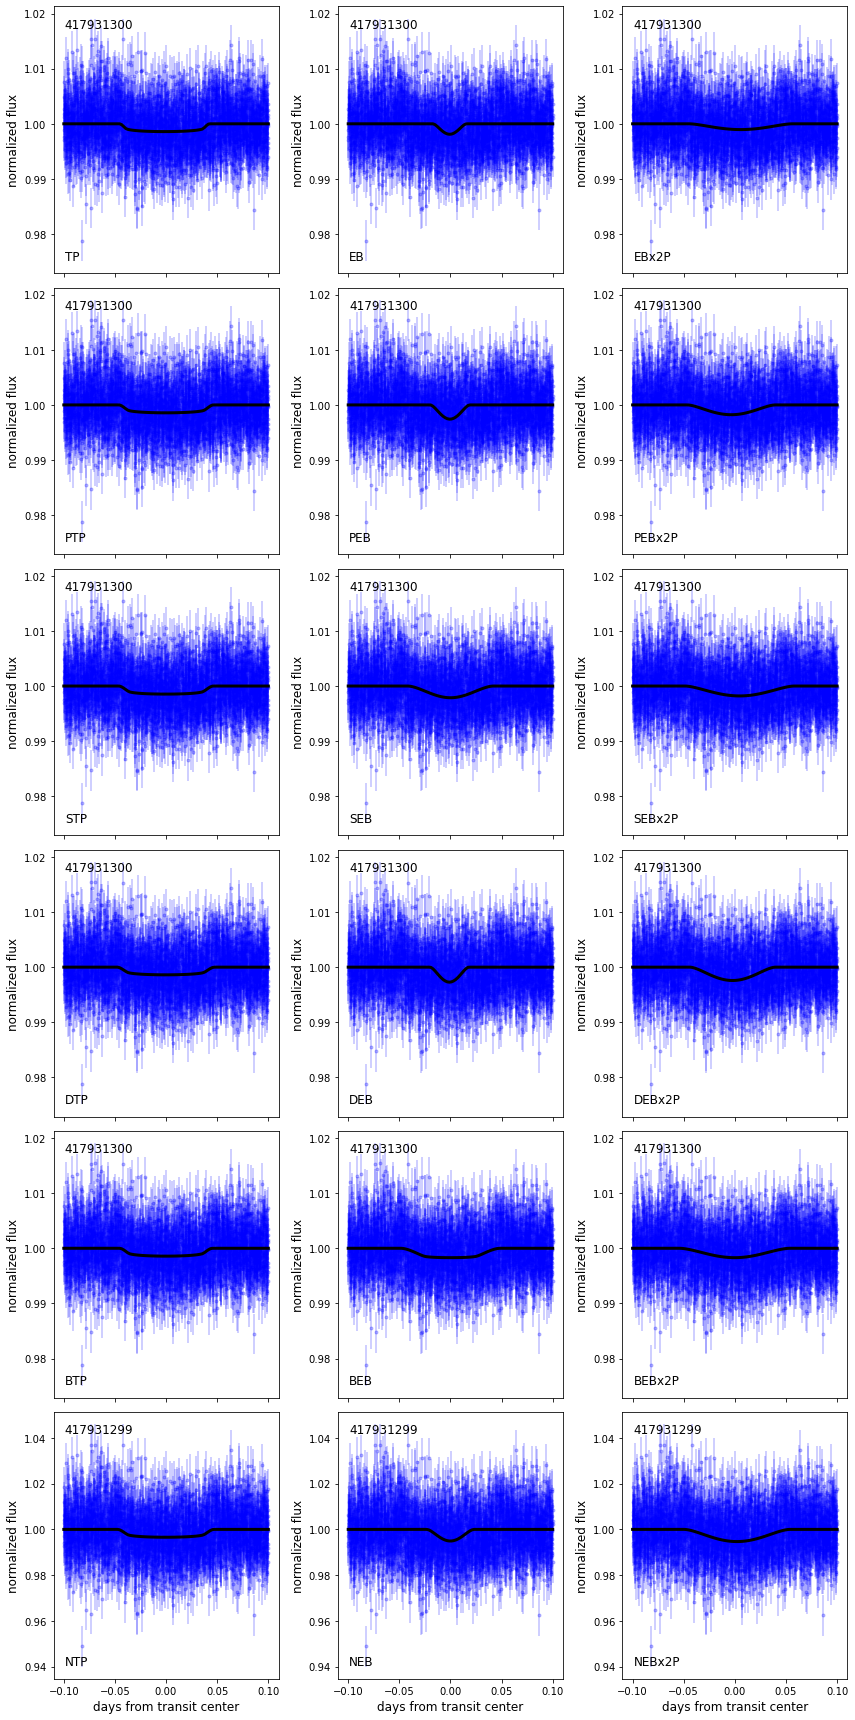

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [13]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.29555183547628494 ,
0.28063688911903784 ,
0.2805231956135379 ,
0.29468091365639637 ,
0.2918955770493732 ,
NFPPs:
0.2895130301299646 ,
0.27474707116993996 ,
0.2744582427893118 ,
0.28876422074255825 ,
0.28559825370365866 ,


In [14]:
ID = 417931300
sectors = np.array([14,15,21,22,41,48])

period = 7.7689153423
tdepth = 0.0009697096956142764

lc_file = "TOI_2068_S14_15_21_22_41_48.csv"
contrastcurve_file = "TOI_2068_BrGamma.csv"

band = 'K'

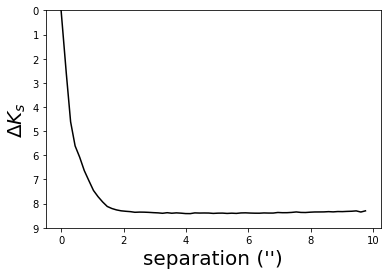

In [15]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

CPU times: total: 2.06 s
Wall time: 2.05 s


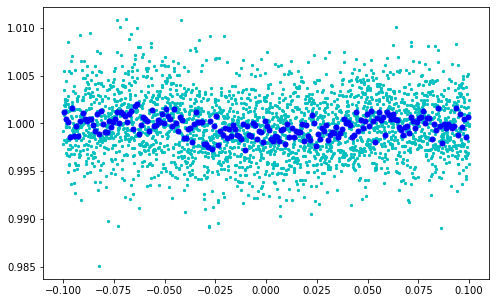

In [16]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [17]:
%%time

FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 417931300.
Calculating EB and EBx2P scenario probabilities for 417931300.
Calculating PTP scenario probability for 417931300.
Calculating PEB and PEBx2P scenario probabilities for 417931300.
Calculating STP scenario probability for 417931300.
Calculating SEB and SEBx2P scenario probabilities for 417931300.
Calculating DTP scenario probability for 417931300.
Calculating DEB and DEBx2P scenario probabilities for 417931300.
Calculating BTP scenario probability for 417931300.
Calculating BEB and BEBx2P scenario probabilities for 417931300.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 417931299.
FPP =  0.2827066942187907
NFPP =  0.28149136065829405
Calculating TP scenario probabilitiey for 417931300.
Calculating EB and EBx2P scenario probabilities for 417931300.
Calculating PTP scenario probability for 417931300.
Calculating PEB and PEBx2P scenario probabilities for 417931300.
Calculating STP scenario probability for 417931300.
Calcul

In [18]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.2827066942187907 ,
0.3020085661455367 ,
0.299987785096561 ,
0.2961615812617747 ,
0.30107095607579026 ,
NFPPs:
0.28149136065829405 ,
0.3007337855371301 ,
0.2990374618194658 ,
0.29510470543782863 ,
0.2997445294985347 ,


In [19]:
##BrGamma

fpp=np.array([0.2827066942187907 ,
0.3020085661455367 ,
0.299987785096561 ,
0.2961615812617747 ,
0.30107095607579026])
nfpp=np.array([0.28149136065829405 ,
0.3007337855371301 ,
0.2990374618194658 ,
0.29510470543782863 ,
0.2997445294985347])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.2963871165596907 +/- 0.007123323431758439
0.29522236859025064 +/- 0.007126500064340956


In [20]:
##Ks filter

fpp=np.array([0.29555183547628494 ,
0.28063688911903784 ,
0.2805231956135379 ,
0.29468091365639637 ,
0.2918955770493732])
nfpp=np.array([0.2895130301299646 ,
0.27474707116993996 ,
0.2744582427893118 ,
0.28876422074255825 ,
0.28559825370365866])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.28865768218292603 +/- 0.00670515657241161
0.28261616370708664 +/- 0.00667431679758961
